参考文章：
- 数据集划分、准确率及超参数：https://mp.weixin.qq.com/s/vvCM0vWH5kmRfrRWxqXT8Q
- 混淆矩阵：https://mp.weixin.qq.com/s/Fi13jaEkM5EGjmS7Mm_Bjw
- 线性回归评价指标：https://mp.weixin.qq.com/s/BEmMdQd2y1hMu9wT8QYCPg


# 划分数据集

建模之前必须划分数据集，分成训练集、验证集、测试集，一般用训练集、测试集建模即可

两种方法：
- 将X和y合并为同一个矩阵，然后对矩阵进行shuffle，之后再分解
- 对y的索引进行乱序，根据索引确定与X的对应关系，最后再通过乱序的索引进行赋值

In [1]:
import numpy as np
from sklearn import datasets
#import matplotlib.pyplot as plt

# 鸢尾花数据集
iris = datasets.load_iris()

X = iris.data
y = iris.target


In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 方法一：对矩阵使用shuffle

In [6]:
# 方法1# 使用concatenate函数进行拼接，因为传入的矩阵必须具有相同的形状。
# 因此需要对label进行reshape操作，reshape(-1,1)表示行数自动计算，1列。
# axis=1表示纵向拼接。（axis=0 是横向拼接）
tempConcat = np.concatenate((X, y.reshape(-1,1)), axis=1)

# 拼接好后，直接进行乱序操作
np.random.shuffle(tempConcat)

# 再将shuffle后的数组使用split方法拆分
shuffle_X,shuffle_y = np.split(tempConcat, [4], axis=1)
# 设置划分的比例  一般，0.8：0.2或0.7：0.3
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
X_train = shuffle_X[test_size:]
y_train = shuffle_y[test_size:]
X_test = shuffle_X[:test_size]
y_test = shuffle_y[:test_size]

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


## 方法二：对y的索引进行乱序

- 模仿sklearn的train_test_split方法

In [14]:
# 方法2# 将x长度这么多的数，返回一个新的打乱顺序的数组，
# 注意，数组中的元素不是原来的数据，而是混乱的索引
shuffle_index = np.random.permutation(len(X))

# 指定测试数据的比例
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
test_index = shuffle_index[:test_size]
train_index = shuffle_index[test_size:]
X_train = X[train_index]
X_test = X[test_index]
y_train = y[train_index]
y_test = y[test_index]

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## 封装方法二代码
- 将上述代码封装在model_selection.py文件中，注意在def前调用此语句 import numpy as np

In [18]:
def train_test_split_byself(X,y,test_ratio=0.2,seed=None):
    """将矩阵X和标签y按照test_ration分割成X_train, X_test, y_train, y_test"""
    assert X.shape[0]==y.shape[0],\
        "the size of X must be equal to the size of y"
    assert 0.0<=test_ratio<=1.0,\
        "test_train must be valid"
    
    # 是否使用随机种子，使随机结果相同，方便debug
    if seed:
        np.random.seed(seed)
        
    # permutation(n) 可直接生成一个随机排列的数组，含有n个元素
    shuffle_index=np.random.permutation(len(y))
    
    test_size=int(len(y)*test_ratio)
    test_index=shuffle_index[:test_size]
    train_index=shuffle_index[test_size:]
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    return X_train,X_test,y_train,y_test

In [20]:
X_train, X_test, y_train, y_test=train_test_split_byself(X,y,test_ratio=0.2,seed=556)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## sklearn中的train_test_split

In [22]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=455)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# 分类准确度accuracy

- 用于评判模型好坏的常用指标之一，存在局限性，不平衡样本不能使用此指标评价模型

In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# 手写数字数据集，封装好的对象，可以理解为一个字段
digits = datasets.load_digits()
# 可以使用keys()方法来看一下数据集的详情
digits.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [24]:
# 5620张图片，每张图片有64个像素点即特征（8*8整数像素图像），每个特征的取值范围是1～16（sklearn中的不全），对应的分类结果是10个数字
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

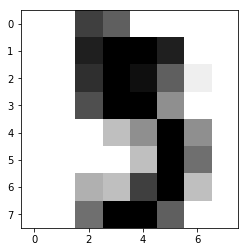

In [30]:
X = digits.data

y = digits.target

# 标签分类digits.target_names
# 可视化
some_digit = X[5]
some_digmit_image = some_digit.reshape(8, 8)
plt.imshow(some_digmit_image, cmap = matplotlib.cm.binary)
plt.show()

## 自己定义分类准确度计算方法
- 封装在metrics.py文件中，方便其他模型调用使用

In [31]:
import numpy as np
from math import sqrt
def accuracy_score(y_true,y_predict):
    """计算y_true和y_predict之间的准确率"""
    
    assert y_true.shape[0]==y_predict.shape[0],\
        "the size of y_true must be equal to the size of y_predict"
    
    return sum(y_true==y_predict)/len(y_true)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)

In [33]:
accuracy_score(y_test,y_predict)

0.9911111111111112

## sklearn中的准确度

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.9888888888888889

# 超参数

- 所谓超参数，就是在机器学习算法模型执行之前需要指定的参数。（调参调的就是超参数,包含权重值）
- 一般是调整2个以上参数，调参常用方法：学习曲线、网格搜索、依据业务经验

## 网格搜索方法——GridSearchCV

In [35]:
param_search = [
    {        
    "weights":["uniform"],        
     "n_neighbors":[i for i in range(1,11)]
    },
    {        
    "weights":["distance"],        
     "n_neighbors":[i for i in range(1,11)],        
     "p":[i for i in range(1,6)]
    }
]

In [36]:
param_search

[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
 {'weights': ['distance'],
  'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'p': [1, 2, 3, 4, 5]}]

In [37]:
knn_clf = KNeighborsClassifier()
# 调用网格搜索方法
from sklearn.model_selection import GridSearchCV
# 定义网格搜索的对象grid_search，其构造函数的第一个参数表示对哪一个分类器进行算法搜索，
# 第二个参数表示网格搜索相应的参数
grid_search = GridSearchCV(knn_clf, param_search)

In [38]:
%%time
grid_search.fit(X_train, y_train)

D:\tool\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 2min 32s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
#最佳分类起所对应的模型
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance')

In [40]:
#查看最佳参数的分类器的准确度
grid_search.best_score_

0.9853862212943633

In [41]:
#最佳分类起所对应的参数
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}